In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Hypertension 0: they dont have 1: They have

heart Disease 0: no 1: yes

The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level(Hemoglobin A1c) indicates diabetes.

High blood glucose levels are a key indicator of diabetes.

Diabetes 0:No 1: yes



In [ ]:
len(data)

100000

In [4]:
data.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [ ]:
print(data.size)

900000


In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
y=data.columns

In [7]:
y

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
for feat in y:
    print(feat,len(data[feat].unique()))

gender 3
age 102
hypertension 2
heart_disease 2
smoking_history 6
bmi 4247
HbA1c_level 18
blood_glucose_level 18
diabetes 2


In [ ]:
data.isnull().count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = data.iloc[:,0].values
data.iloc[:,0] = labelencoder.fit_transform(X)
X = X.reshape(-1,2)

<ipython-input-9-60ef2fa6fea2>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,0] = labelencoder.fit_transform(X)


This makes gender inputs into 0, 1 and 2
Female : 0, Male: 1 and Others: 2

It also can be done by: data['gender']=data['gender'].map({'Female':0,'Male':1,'Others':2})

In [ ]:
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.head(12672)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
12667,0,54.0,0,0,ever,43.54,6.6,260,1
12668,0,22.0,0,0,current,30.63,6.2,130,0
12669,2,10.0,0,0,not current,14.09,5.0,140,0
12670,0,24.0,0,0,never,21.22,5.8,155,0


In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = data.iloc[:,4].values
data.iloc[:,4] = labelencoder.fit_transform(X)
X = X.reshape(-1,4)

<ipython-input-10-2ece56e7b848>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,4] = labelencoder.fit_transform(X)


In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


Never: 4, No Info: 0, Current: 1, Former: 3, ever: 2

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [12]:
x = data['heart_disease']
x.value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

Text(0.5, 1.0, 'Heart Diseases')

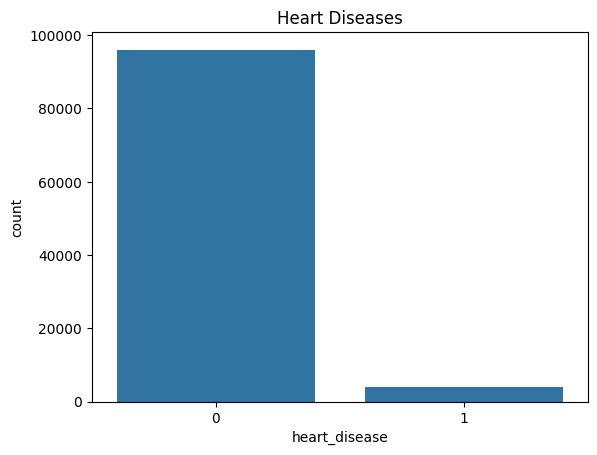

In [13]:
sns.countplot(x = 'heart_disease', data = data)
plt.title("Heart Diseases")

In [14]:
smote = SMOTE(random_state = 27)
smote_data, smote_x = smote.fit_resample(data, x)

In [15]:
print('Before sampling class distribution', Counter(x))
print('After sampling class distribution', Counter(smote_x))

Before sampling class distribution Counter({0: 96058, 1: 3942})
After sampling class distribution Counter({1: 96058, 0: 96058})


Text(0.5, 1.0, 'Heart Diseases')

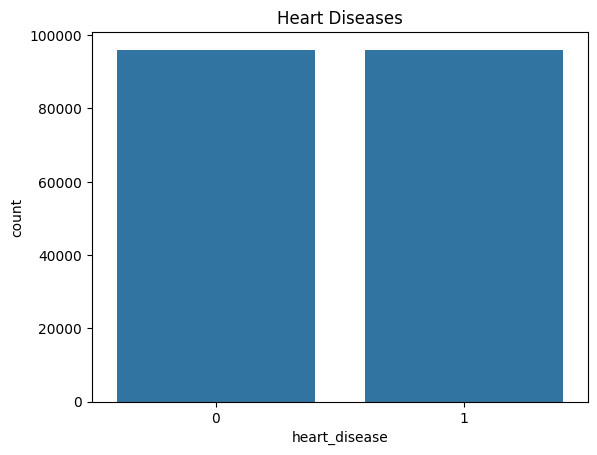

In [16]:
sns.countplot(x = 'heart_disease', data = smote_data)
plt.title("Heart Diseases")

In [17]:
data = smote_data

<ipython-input-24-58b036479bb9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['smoking_history'],kde=False)


<Axes: xlabel='smoking_history'>

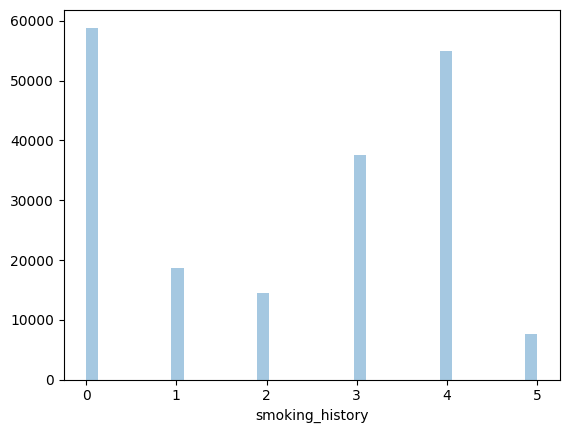

In [ ]:
sns.distplot(data['smoking_history'],kde=False)

<ipython-input-25-2a8ec9c0fcf2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'],kde=False)


<Axes: xlabel='bmi'>

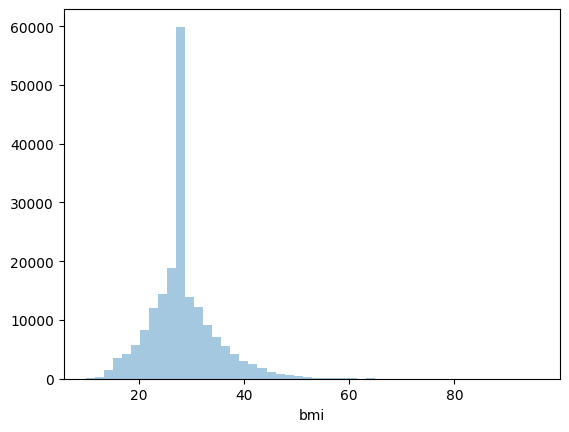

In [ ]:
sns.distplot(data['bmi'],kde=False)

<ipython-input-26-ded0f8117429>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HbA1c_level'],kde=False)


<Axes: xlabel='HbA1c_level'>

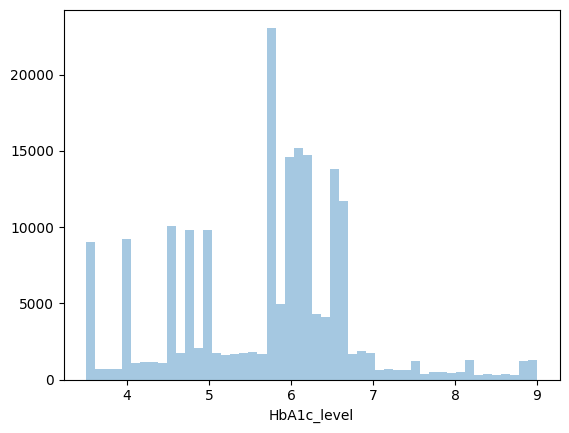

In [ ]:
sns.distplot(data['HbA1c_level'],kde=False)

<ipython-input-32-d0f4b7a1fe65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['blood_glucose_level'],kde=False)


<Axes: xlabel='blood_glucose_level'>

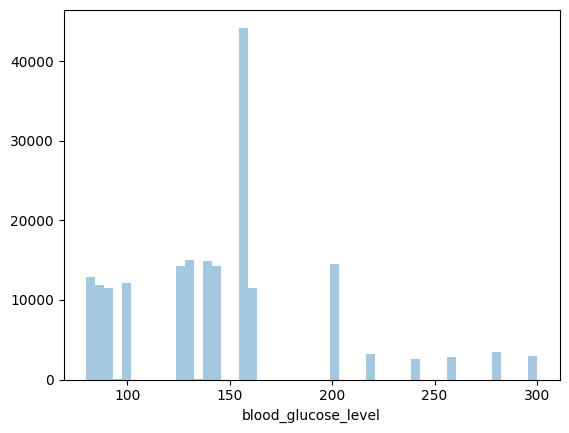

In [ ]:
sns.distplot(data['blood_glucose_level'],kde=False)

<ipython-input-33-26f60217a83a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['heart_disease'],kde=False)


<Axes: xlabel='heart_disease'>

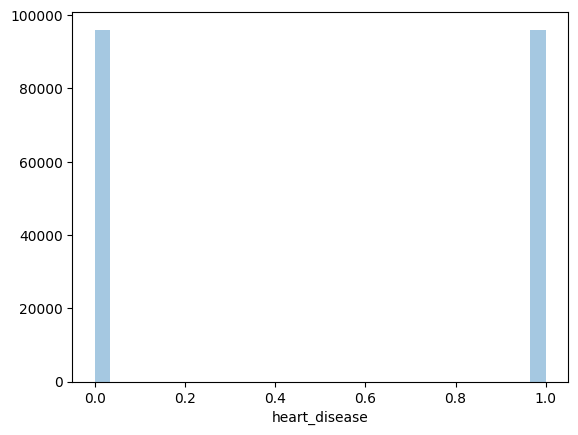

In [ ]:
sns.distplot(data['heart_disease'],kde=False)

In [ ]:
data.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


<ipython-input-35-817307ba4de1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['gender'],kde=False)


<Axes: xlabel='gender'>

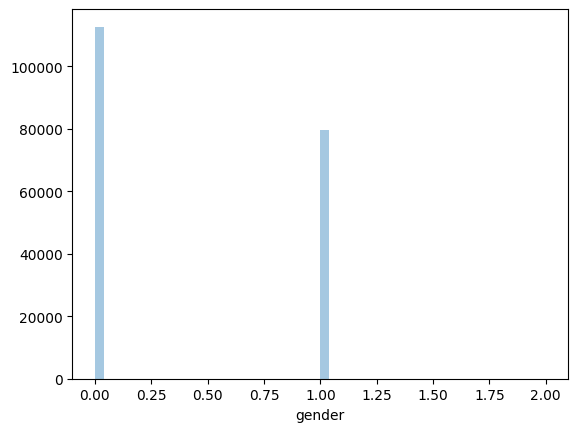

In [ ]:
sns.distplot(data['gender'],kde=False)

<ipython-input-36-82fb750baecb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],kde=False)


<Axes: xlabel='age'>

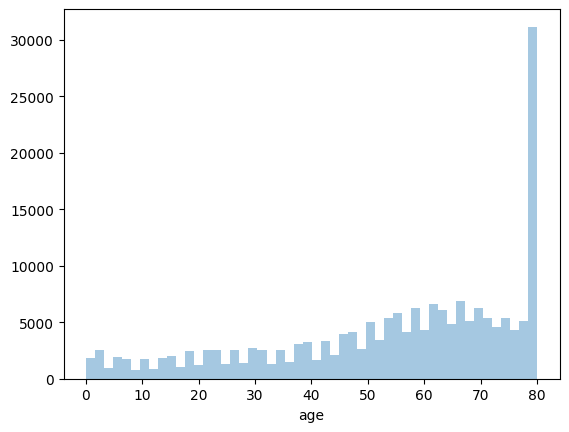

In [ ]:
sns.distplot(data['age'],kde=False)

In [ ]:
data['diabetes'].unique()

array([0, 1])

In [18]:
X=data.iloc[:,:-1]

In [19]:
Y=data.iloc[:,-1]

In [20]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.00000,0,1,4,25.190000,6.600000,140
1,0,54.00000,0,0,0,27.320000,6.600000,80
2,1,28.00000,0,0,4,27.320000,5.700000,158
3,0,36.00000,0,0,1,23.450000,5.000000,155
4,1,76.00000,1,1,1,20.140000,4.800000,155
...,...,...,...,...,...,...,...,...
192111,0,80.00000,0,1,3,27.224721,6.552399,100
192112,0,67.39825,0,1,5,32.586565,6.200000,145
192113,0,60.00000,0,1,4,30.377257,6.541499,100
192114,1,80.00000,0,1,0,26.997855,4.463092,100


In [21]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
192111    0
192112    0
192113    0
192114    0
192115    1
Name: diabetes, Length: 192116, dtype: int64

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
chi2_selector = SelectKBest(score_func=chi2, k=2)
X_new = chi2_selector.fit_transform(X, Y)

# Print the selected features
print(chi2_selector.get_support())

[False  True False False False False False  True]


In [ ]:

# Perform chi-square test and obtain chi-square scores
chi_scores = chi2(X, Y)

# Display the chi-square scores
print(chi_scores)

(array([8.20451420e+01, 8.05767223e+04, 3.62048542e+03, 2.83276107e+03,
       1.45648777e+03, 7.40789884e+03, 3.32913937e+03, 2.11290675e+05]), array([1.33013709e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [24]:
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train,Y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [25]:
predictions=logmodel.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
accuracy=confusion_matrix(Y_test,predictions)

In [28]:
accuracy

array([[39732,  1180],
       [ 2836,  4281]])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy=accuracy_score(Y_test,predictions)
accuracy

0.9163838514230985

In [31]:
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
Y_test

184596    0
62655     0
10214     1
134020    0
174000    1
         ..
13451     1
867       0
166636    0
162778    0
68350     0
Name: diabetes, Length: 48029, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [34]:
print('Report :')
print(classification_report(Y_test, predictions))

Report :
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     40912
           1       0.78      0.60      0.68      7117

    accuracy                           0.92     48029
   macro avg       0.86      0.79      0.82     48029
weighted avg       0.91      0.92      0.91     48029



In [68]:
from sklearn.metrics import roc_curve, auc

In [69]:
Y_scores = logmodel.predict_proba(X_test)[:, 1]

In [70]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)
roc_auc = auc(fpr, tpr)

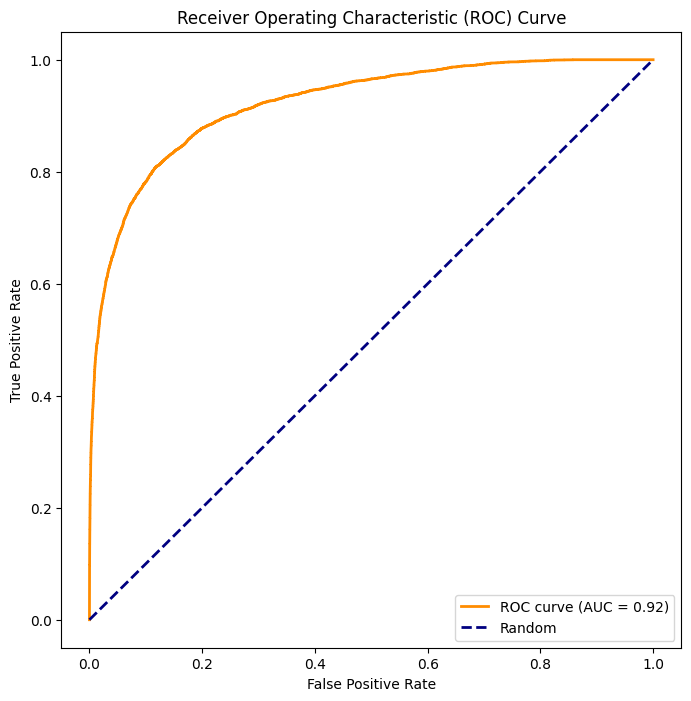

In [71]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,Y_train)

In [37]:
pred=knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [39]:
print(confusion_matrix(Y_test,pred))

[[40134   778]
 [  979  6138]]


In [40]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     40912
           1       0.89      0.86      0.87      7117

    accuracy                           0.96     48029
   macro avg       0.93      0.92      0.93     48029
weighted avg       0.96      0.96      0.96     48029



In [72]:
from sklearn.metrics import roc_curve, auc

In [73]:
Y_scores = knn.predict_proba(X_test)[:, 1]

In [74]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)
roc_auc = auc(fpr, tpr)

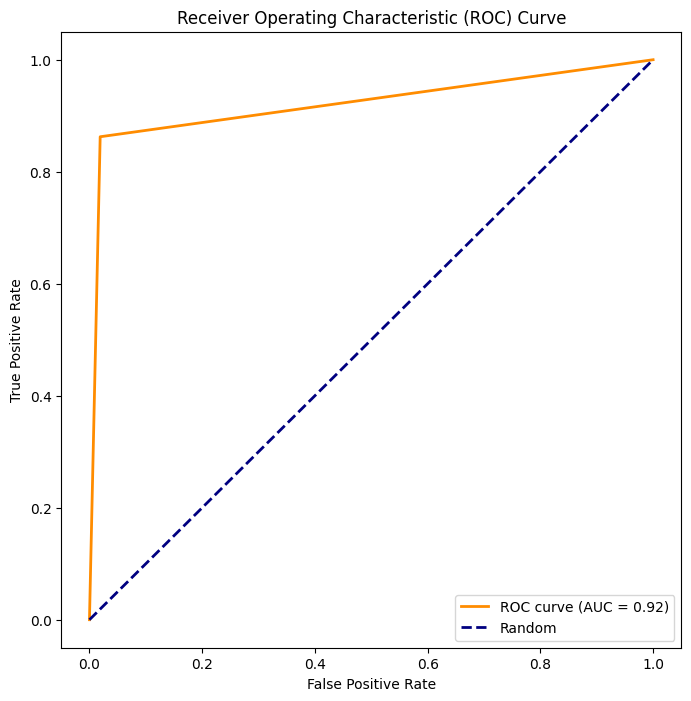

In [75]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
from sklearn import tree

In [42]:
from sklearn import tree

In [43]:
model=tree.DecisionTreeClassifier()

In [44]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [45]:
model.score(X_train,Y_train)

0.999569704414694

In [46]:
pred=model.predict(X_test)

In [47]:
metrics.accuracy_score(pred,Y_test)

0.9610443690270462

In [48]:
metrics.confusion_matrix(pred,Y_test)

array([[39915,   874],
       [  997,  6243]])

In [49]:
accuracy=accuracy_score(Y_test,pred)
accuracy

0.9610443690270462

In [50]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     40912
           1       0.86      0.88      0.87      7117

    accuracy                           0.96     48029
   macro avg       0.92      0.93      0.92     48029
weighted avg       0.96      0.96      0.96     48029



In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
RF=RandomForestClassifier(criterion='entropy',max_depth=5,n_estimators=60,n_jobs=-1,random_state=6)

In [53]:
RF.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=60,
                       n_jobs=-1, random_state=6)

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=6),param_grid=hyper,verbose=True)
gd.fit(X_train,Y_train)
print(gd.best_score_)
print(gd.best_estimator_)

In [54]:
RF_pred=RF.predict(X_test)

In [55]:
metrics.accuracy_score(RF_pred,Y_test)

0.9505923504549335

In [56]:
metrics.confusion_matrix(RF_pred,Y_test)

array([[40599,  2060],
       [  313,  5057]])

In [57]:
print(classification_report(Y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40912
           1       0.94      0.71      0.81      7117

    accuracy                           0.95     48029
   macro avg       0.95      0.85      0.89     48029
weighted avg       0.95      0.95      0.95     48029



Logistic regression 0.92

KNN 0.96

Decision Tree 0.96

Random forest 0.95

In [62]:
from sklearn.metrics import roc_curve, auc

In [65]:
Y_scores = RF.predict_proba(X_test)[:, 1]

In [66]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)
roc_auc = auc(fpr, tpr)

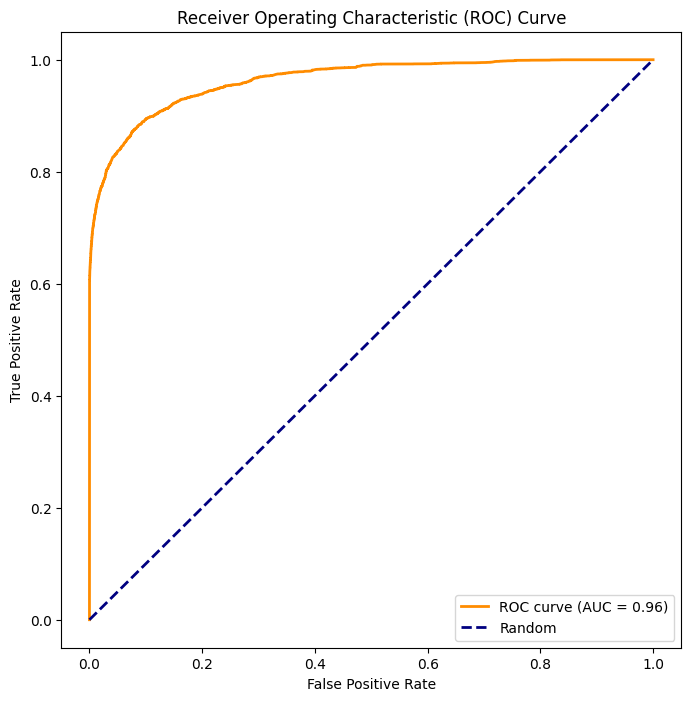

In [67]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier



# Define base classifiers
rf_classifier = RandomForestClassifier(n_estimators=60, random_state=6)
knn_classifier = KNeighborsClassifier(n_neighbors=1)
lr_classifier = LogisticRegression(max_iter = 2000, random_state=42)

# Define stacking classifier
estimators = [('rf', rf_classifier),
              ('knn', knn_classifier),
              ('lr', lr_classifier)]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train stacking classifier
stacking_classifier.fit(X_train, Y_train)

# Evaluate stacking classifier
accuracy = stacking_classifier.score(X_test, Y_test)
print("Stacking Classifier Accuracy:", accuracy)

Stacking Classifier Accuracy: 0.9757230006870848


In [77]:
predictions=stacking_classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
accuracy=confusion_matrix(Y_test,predictions)

In [80]:
accuracy

array([[40601,   311],
       [  855,  6262]])

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy=accuracy_score(Y_test,predictions)
accuracy

0.9757230006870848

In [83]:
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
Y_test

184596    0
62655     0
10214     1
134020    0
174000    1
         ..
13451     1
867       0
166636    0
162778    0
68350     0
Name: diabetes, Length: 48029, dtype: int64

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [86]:
print('Report :')
print(classification_report(Y_test, predictions))

Report :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     40912
           1       0.95      0.88      0.91      7117

    accuracy                           0.98     48029
   macro avg       0.97      0.94      0.95     48029
weighted avg       0.98      0.98      0.98     48029



In [87]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=20000, n_features=9, n_classes=2, random_state=42)

Y_scores = stacking_classifier.predict_proba(X_test)[:, 1]
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_scores)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

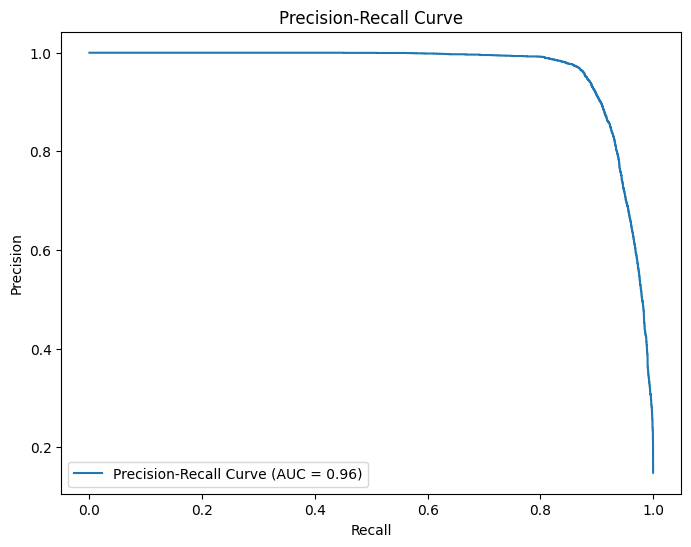

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import roc_curve, auc

In [90]:
Y_scores = stacking_classifier.predict_proba(X_test)[:, 1]

In [91]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)
roc_auc = auc(fpr, tpr)

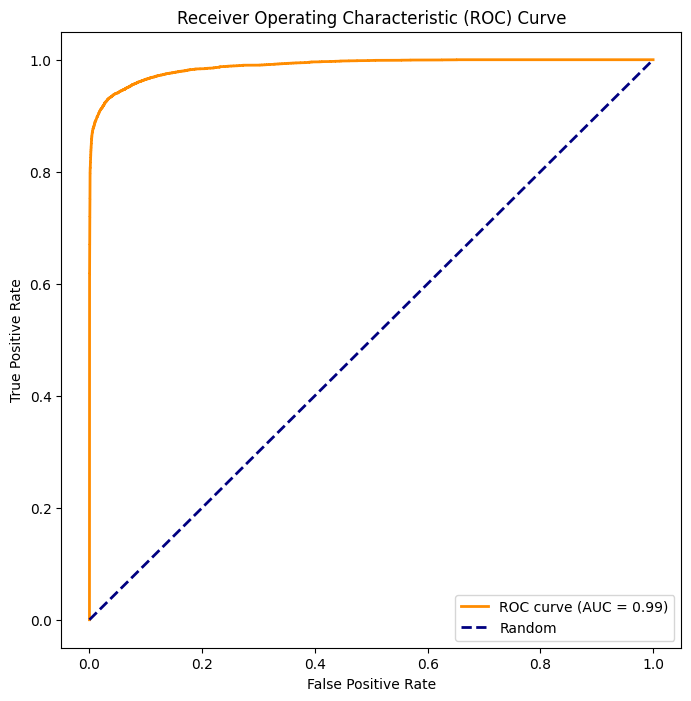

In [92]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()